In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import distutils as distutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1.Data Preprocessing

In [2]:
data = pd.read_csv('data.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

1.1 Handling Missing Values

In [4]:
#Checking the null values 
pd.isnull(data).sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

As we can see, there is no null or missing values in the data

1.2 Data Cleaning

In [5]:
import pandas as pd
from scipy import stats
import numpy as np

# Remove duplicate records
data_cleaned = data.drop_duplicates()

# Dealing with outliers using z-score method
# Assuming 'duration_ms' is a numerical feature containing song durations
z_scores = np.abs(stats.zscore(data_cleaned['duration_ms']))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the DataFrame
data_cleaned.drop(outlier_indices[0], inplace=True)

# Create a new DataFrame 'data_mod' after data cleaning
data_mod = data_cleaned.copy()

# Print the number of removed outliers
print("Number of outliers removed:", len(outlier_indices[0]))

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", data_mod.shape)


Number of outliers removed: 2156
Shape of cleaned DataFrame: (168497, 19)


In [6]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168497 entries, 1 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           168497 non-null  float64
 1   year              168497 non-null  int64  
 2   acousticness      168497 non-null  float64
 3   artists           168497 non-null  object 
 4   danceability      168497 non-null  float64
 5   duration_ms       168497 non-null  int64  
 6   energy            168497 non-null  float64
 7   explicit          168497 non-null  int64  
 8   id                168497 non-null  object 
 9   instrumentalness  168497 non-null  float64
 10  key               168497 non-null  int64  
 11  liveness          168497 non-null  float64
 12  loudness          168497 non-null  float64
 13  mode              168497 non-null  int64  
 14  name              168497 non-null  object 
 15  popularity        168497 non-null  int64  
 16  release_date      168497 

1.3 Feature Scaling

In [7]:
data_mod["duration"] = data_mod["duration_ms"].apply(lambda x:round(x/1000))
data_mod.drop("duration_ms",inplace=True,axis=1)
data_mod["rating"] = data_mod["popularity"].apply(lambda x:round(x/20))
data_mod.drop("popularity",inplace=True,axis=1)


1.4 Data Splitting 

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_mod.drop(columns=['rating'])  # Features excluding the target variable
y = data_mod['rating']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (134797, 18)
Shape of X_test: (33700, 18)
Shape of y_train: (134797,)
Shape of y_test: (33700,)


# 2.Exploratory Data Analysis

In [9]:
data_mod.head()

,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,duration,rating
1,0.9630,1921,0.732,['Dennis Day'],0.819,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,1921,0.4150,60.936,181,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,1921,0.0339,110.339,500,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,1921,0.0354,100.109,210,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,1921,0.0380,101.665,167,0
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,1921,0.0700,119.824,395,0


In [10]:
data_mod.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
valence,168497.0,0.531754,0.262027,0.0,0.3220,0.543000,0.7490,1.000
year,168497.0,1976.982836,25.932813,1921.0,1956.0000,1978.000000,1999.0000,2020.000
acousticness,168497.0,0.499629,0.375873,0.0,0.0998,0.510000,0.8910,0.996
danceability,168497.0,0.539665,0.175078,0.0,0.4190,0.550000,0.6700,0.988
energy,168497.0,0.484311,0.267386,0.0,0.2580,0.474000,0.7050,1.000
explicit,168497.0,0.085450,0.279550,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,168497.0,0.163476,0.310919,0.0,0.0000,0.000195,0.0901,1.000
key,168497.0,5.200769,3.514668,0.0,2.0000,5.000000,8.0000,11.000
liveness,168497.0,0.205071,0.173339,0.0,0.0987,0.136000,0.2610,1.000
loudness,168497.0,-11.414945,5.681034,-60.0,-14.5310,-10.525000,-7.1470,3.855


Coreelation Heat Map Analysis between the Features

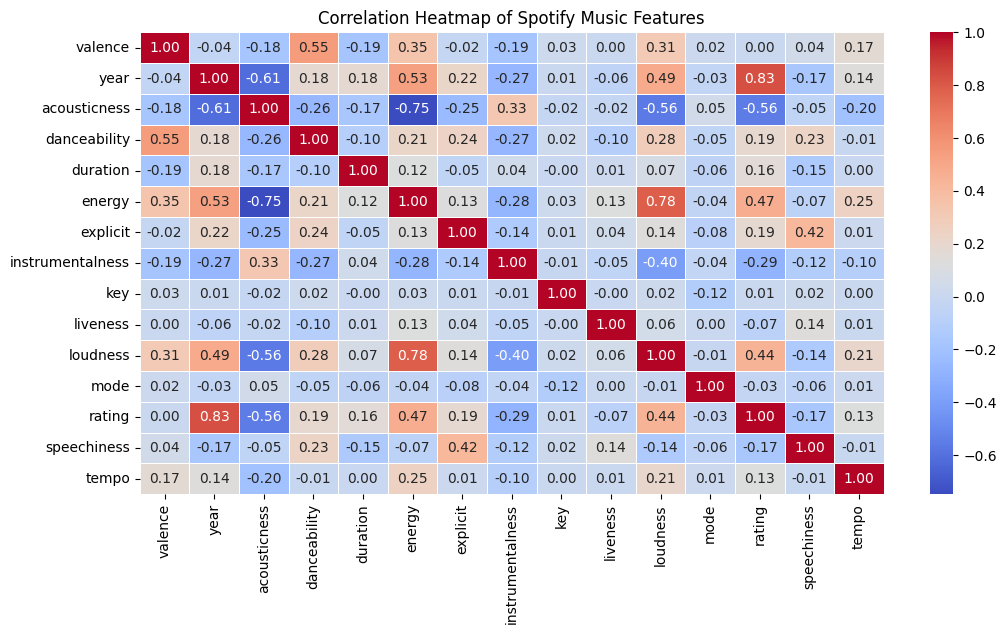

In [11]:
# Selecting only the relevant columns
# Name, ID and release_date are not relevant features
relevant_columns = ['valence', 'year', 'acousticness', 'danceability', 'duration', 'energy', 'explicit', 
                    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'rating', 'speechiness', 'tempo']
data_relevant = data_mod[relevant_columns]

# Calculate the correlation matrix
correlation_matrix = data_relevant.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Spotify Music Features')
plt.show()


We can see that energy and loudness has a very high positive correlation, energy and acousticness has a very very high negative correlation and Popularity and year has a very high positive correlation, which we also see later by various plot

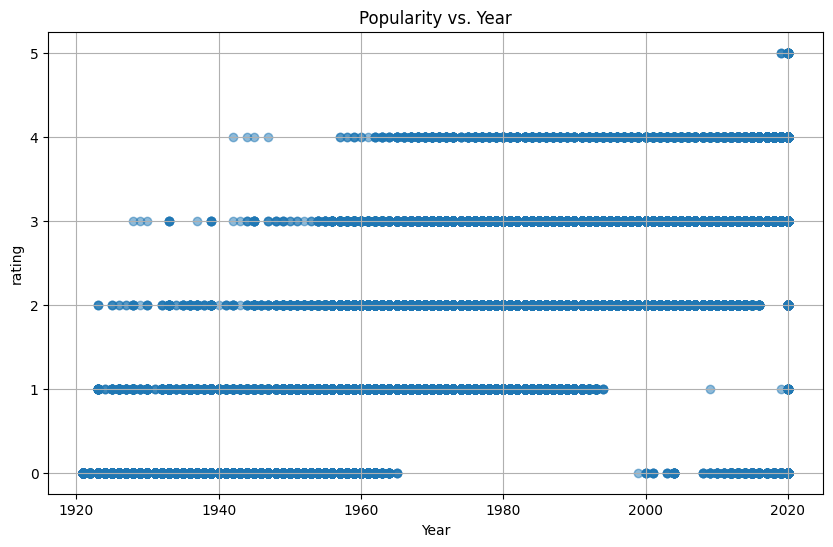

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data_mod['year'], data_mod['rating'], alpha=0.5)
plt.title('Popularity vs. Year')
plt.xlabel('Year')
plt.ylabel('rating')
plt.grid(True)
plt.show()


We Can see clearly that popularity is increasing by year


C:\Users\nik81\AppData\Local\Temp\ipykernel_16088\1128338292.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='duration', data=avg_duration_per_year, palette='viridis')


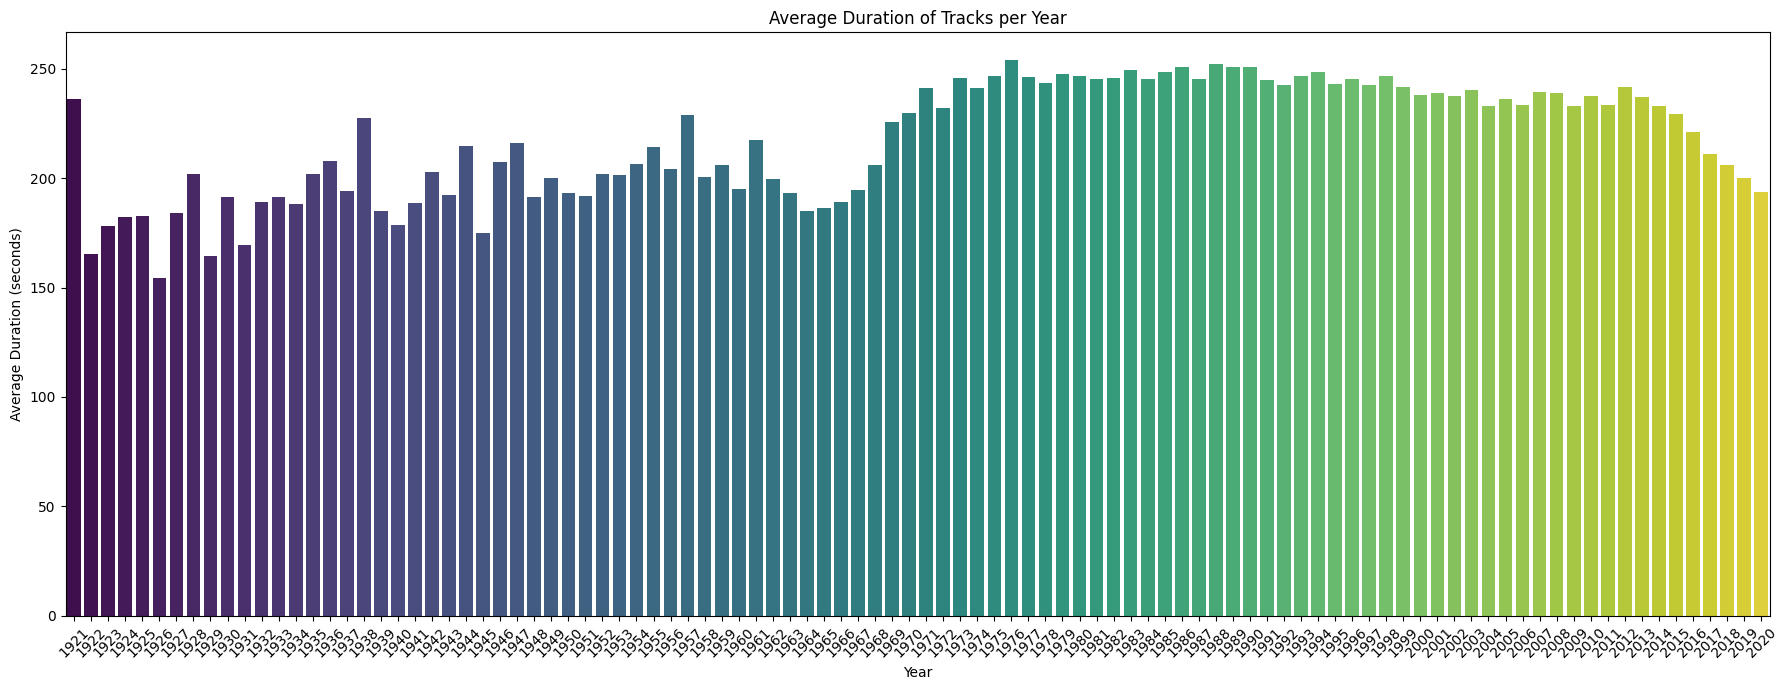

In [13]:
# Calculate the average duration for each year
avg_duration_per_year = data_mod.groupby('year')['duration'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(18, 7))
sns.barplot(x='year', y='duration', data=avg_duration_per_year, palette='viridis')
plt.title('Average Duration of Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that before 1964, average duration of song keep fluctuating between 150-220 seconds , but after 1964, duration keeps on increaasing and became constant for sometime and after 2012 average duration again decreases

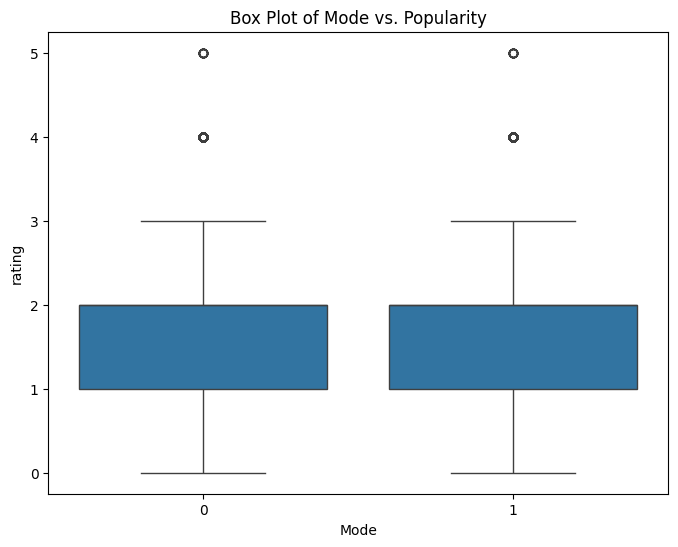

In [14]:
# Box plot of a numerical feature vs. a categorical feature (e.g., 'mode' vs. 'popularity')
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='rating', data=data_mod)
plt.title('Box Plot of Mode vs. Popularity')
plt.xlabel('Mode')
plt.ylabel('rating')
plt.show()


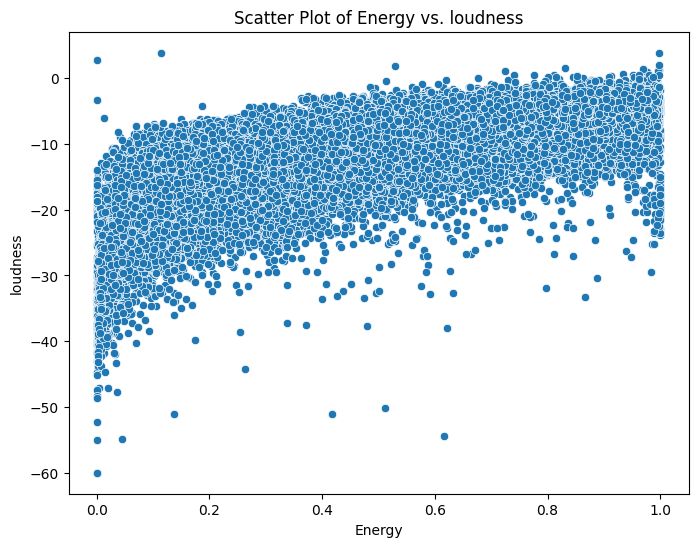

In [15]:
# Scatter plot of two numerical features (e.g., 'energy' vs. 'loudness')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='loudness', data=data_mod)
plt.title('Scatter Plot of Energy vs. loudness')
plt.xlabel('Energy')
plt.ylabel('loudness')
plt.show()

Now we can clearly see that, their is a positive correlation between loudness and energy

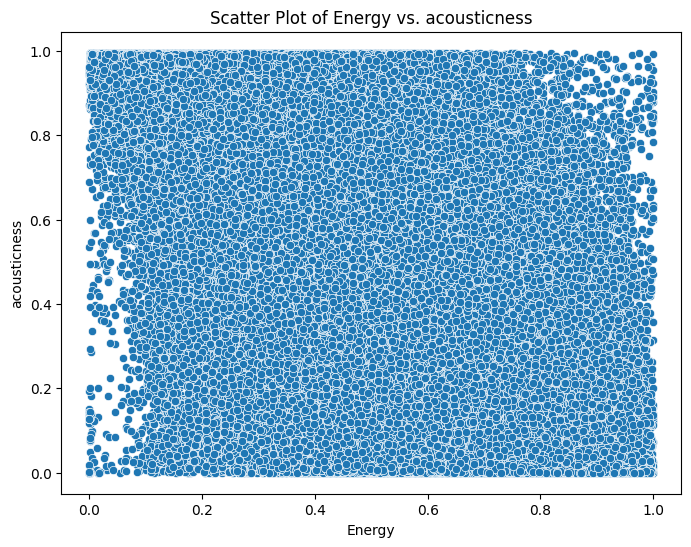

In [16]:
# Scatter plot of two numerical features (e.g., 'energy' vs. 'acousticness')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='acousticness', data=data_mod)
plt.title('Scatter Plot of Energy vs. acousticness')
plt.xlabel('Energy')
plt.ylabel('acousticness')
plt.show()

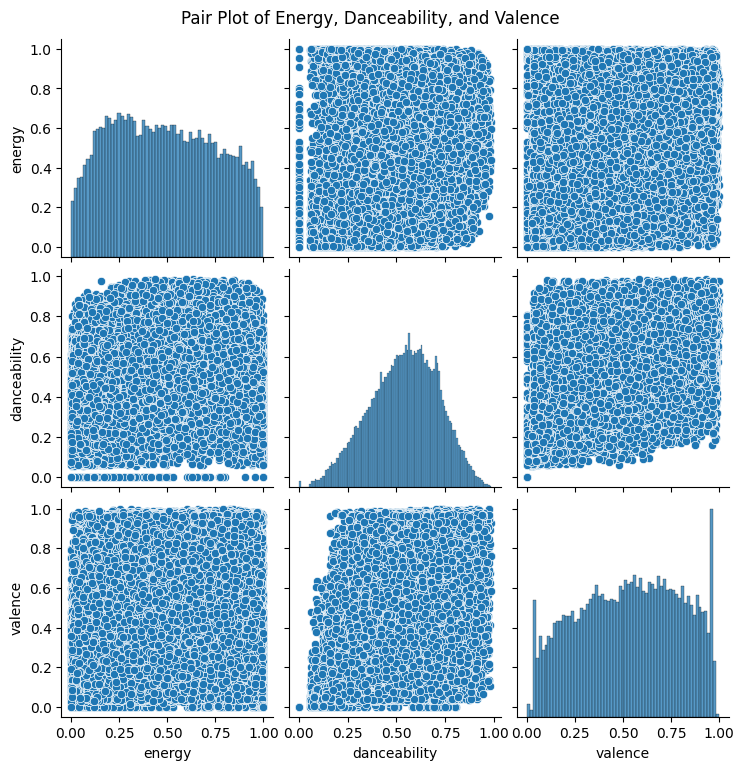

In [17]:
# Pair plot of multiple numerical features (e.g., 'energy', 'danceability', 'valence')
sns.pairplot(data_mod[['energy', 'danceability', 'valence']])
plt.suptitle('Pair Plot of Energy, Danceability, and Valence', y=1.02)
plt.show()

In [18]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# 3.Model Selection and Training

C:\Users\nik81\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3370/3370 - 13s - 4ms/step - loss: 0.4205 - val_loss: 0.3514
Epoch 2/50
3370/3370 - 11s - 3ms/step - loss: 0.3644 - val_loss: 0.3450
Epoch 3/50
3370/3370 - 10s - 3ms/step - loss: 0.3537 - val_loss: 0.3327
Epoch 4/50
3370/3370 - 10s - 3ms/step - loss: 0.3485 - val_loss: 0.3322
Epoch 5/50
3370/3370 - 10s - 3ms/step - loss: 0.3461 - val_loss: 0.3310
Epoch 6/50
3370/3370 - 12s - 4ms/step - loss: 0.3433 - val_loss: 0.3298
Epoch 7/50
3370/3370 - 12s - 4ms/step - loss: 0.3419 - val_loss: 0.3299
Epoch 8/50
3370/3370 - 11s - 3ms/step - loss: 0.3415 - val_loss: 0.3297
Epoch 9/50
3370/3370 - 14s - 4ms/step - loss: 0.3399 - val_loss: 0.3288
Epoch 10/50
3370/3370 - 12s - 4ms/step - loss: 0.3389 - val_loss: 0.3305
Epoch 11/50
3370/3370 - 14s - 4ms/step - loss: 0.3382 - val_loss: 0.3284
Epoch 12/50
3370/3370 - 18s - 5ms/step - loss: 0.3382 - val_loss: 0.3245
Epoch 13/50
3370/3370 - 22s - 7ms/step - loss: 0.3369 - val_loss: 0.3266
Epoch 14/50
3370/3370 - 12s - 4ms/step - loss: 0.3368 - val_

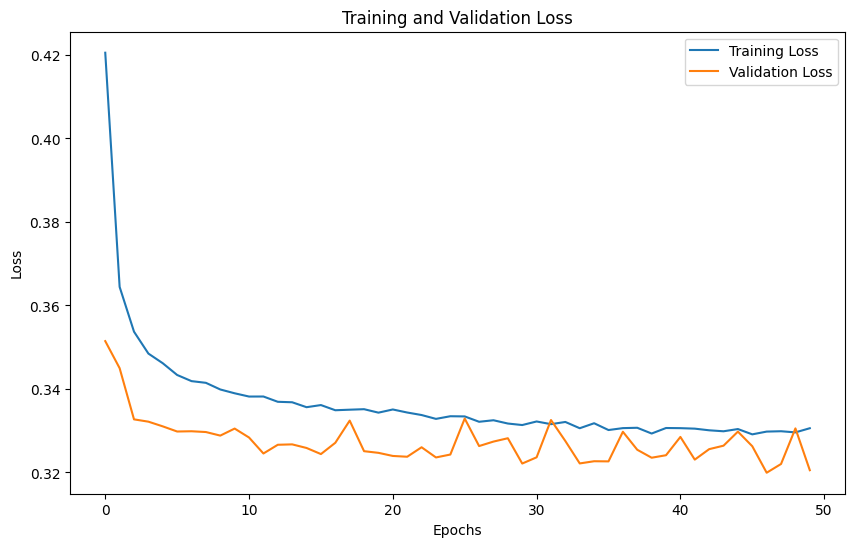

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Load the Spotify dataset
#df = pd.read_csv('spotify_data.csv')  # Replace 'spotify_data.csv' with your dataset filename

# Select input features and target variable
features = ['valence', 'year', 'acousticness', 'danceability', 'duration', 'energy', 'explicit', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']
target = 'rating'

X = data_mod[features]
y = data_mod[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error on Test Set:", mse)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


There is one more data Spotify has access to, which is the user rating for a song
This is calculated as proportional to listening time vs song duration
    
      Although this data is not available anywhere (spotify can't make user data public), but we still desined a modelthat first converts the rating (generated by us in below example) into a boolean, then use PLA, SVM and pocket algorithmto predict wheather to recommend the song or not.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

df = pd.read_csv("data.csv")

columns_to_drop = ["artists", "id" , "name"]

new_df = df.drop(columns_to_drop, axis=1)

new_df.drop_duplicates(inplace=True) in df

# Now, since there was anomaly 

new_df['release_date'] = new_df['release_date'].astype(str)

new_df['Year'] = new_df['release_date'].str.extract(r'(\d{4})')

new_df['release_date'] = new_df['Year'].fillna(df['release_date'])

new_df.drop(columns=['Year'], inplace=True)

new_df.to_csv("new_dataset.csv", index=False)

In [21]:
new_df = pd.read_csv("new_dataset.csv")
X = new_df.values





In [22]:
w = np.random.rand(X.shape[1])  # Randomly generate coefficients for target function


target_function = np.dot(X, w[0:]) 

y = np.where(target_function >= np.median(target_function), 1, 0)  
print(w[0:])

[0.661847   0.77901483 0.8068332  0.53879746 0.84157159 0.62196053
 0.81871784 0.93814936 0.57188586 0.79075769 0.71876067 0.09455933
 0.3334306  0.74251643 0.07785788 0.18002152]


In [23]:
new_df['Target'] = y
new_df.to_csv("final_dataset.csv", index=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron_error = 1 - perceptron.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
svm_error = 1 - svm.score(X_test, y_test)

class PocketAlgorithm:
    def __init__(self):
        self.w_pocket = None
        self.errors = []

    def fit(self, X, y, max_iters=1000):
        self.w_pocket = np.zeros(X.shape[1])
        w_best = np.zeros(X.shape[1])
        best_error = len(X)    

        for step in range(max_iters):
            w = np.random.rand(X.shape[1])
            errors = np.sum(np.sign(X @ w) != y)
            
            if errors < best_error:
                self.w_pocket = w.copy()
                w_best = w.copy()
                best_error = errors
                self.errors.append(errors)
            else:  
                continue
        return w_best

    def score(self, X, y):
        return np.sum(np.sign(X @ self.w_pocket) != y) / len(X)

pocket_algorithm = PocketAlgorithm()
pocket_algorithm.fit(X_train, y_train)

pocket_error = pocket_algorithm.score(X_test, y_test)
print("pocket error:",pocket_error)

print("Perceptron Error:", perceptron_error)

print("SVM Error:", svm_error)


pocket error: 0.4998676042248963
Perceptron Error: 0.07417105534143398
SVM Error: 0.00035305540027652516


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X1 = data_mod[['valence', 'year', 'acousticness', 'danceability', 'duration', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'year', 'speechiness', 'tempo']]
Y1 = data_mod['rating']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.37408024856686206


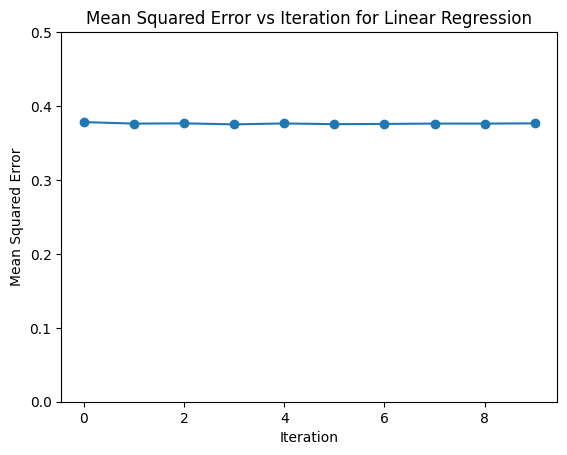

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



# Define lists to store MSE values and iterations
mse_values = []
iterations = []


regression_model = LinearRegression()

num_iterations = 10

for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=i)
    
    regression_model.fit(X_train, y_train)
    
    y_train_pred = regression_model.predict(X_train)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    mse_values.append(mse_train)
    iterations.append(i)

plt.plot(iterations, mse_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Iteration for Linear Regression')
plt.ylim(0, 0.5) 
plt.show()